In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
df = pd.read_csv('airbnb_data.csv')

In [3]:
# Data Exploration and Preprocessing
print(df.head())
print(df.info())
print(df.describe())

         id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
0  Real Bed              strict          True  ...  40.696524  -73.991617   
1  Real Bed     

In [4]:
# Handle missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

In [5]:
# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    if col not in ['id', 'thumbnail_url', 'name', 'description', 'neighbourhood', 'zipcode', 'host_since', 'first_review', 'last_review', 'amenities']:
        df[col] = le.fit_transform(df[col])

In [6]:
# Feature engineering
df['num_amenities'] = df['amenities'].apply(lambda x: len(str(x).split(',')))
df['host_activity'] = pd.to_datetime(df['last_review']).apply(lambda x: (pd.Timestamp('today') - x).days)

C:\Users\JASHANDEEP SINGH\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18-07-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\JASHANDEEP SINGH\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23-09-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\JASHANDEEP SINGH\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-09-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\JASHANDEEP SINGH\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22-01-2017' in

In [7]:
# One-hot encoding for amenities
amenities = df['amenities'].apply(lambda x: str(x).split(','))
unique_amenities = set()
for amenities_list in amenities:
    unique_amenities.update(amenities_list)

for amenity in unique_amenities:
    df[amenity] = df['amenities'].apply(lambda x: 1 if amenity in str(x) else 0)


C:\Users\JASHANDEEP SINGH\AppData\Local\Temp\ipykernel_27512\99900914.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[amenity] = df['amenities'].apply(lambda x: 1 if amenity in str(x) else 0)
C:\Users\JASHANDEEP SINGH\AppData\Local\Temp\ipykernel_27512\99900914.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[amenity] = df['amenities'].apply(lambda x: 1 if amenity in str(x) else 0)
C:\Users\JASHANDEEP SINGH\AppData\Local\Temp\ipykernel_27512\99900914.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\JASHANDEEP SINGH\AppData\Local\Temp\ipykernel_27512\99900914.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[amenity] = df['amenities'].apply(lambda x: 1 if amenity in str(x) else 0)
C:\Users\JASHANDEEP SINGH\AppData\Local\Temp\ipykernel_27512\99900914.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[amenity] = df['amenities'].apply(lambda x: 1 if amenity in str(x) else 0)
C:\Users\JASHANDEEP SINGH\AppData\Local\Temp\ipykernel_27512\99900914.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\JASHANDEEP SINGH\AppData\Local\Temp\ipykernel_27512\99900914.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[amenity] = df['amenities'].apply(lambda x: 1 if amenity in str(x) else 0)
C:\Users\JASHANDEEP SINGH\AppData\Local\Temp\ipykernel_27512\99900914.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[amenity] = df['amenities'].apply(lambda x: 1 if amenity in str(x) else 0)
C:\Users\JASHANDEEP SINGH\AppData\Local\Temp\ipykernel_27512\99900914.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\JASHANDEEP SINGH\AppData\Local\Temp\ipykernel_27512\99900914.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[amenity] = df['amenities'].apply(lambda x: 1 if amenity in str(x) else 0)
C:\Users\JASHANDEEP SINGH\AppData\Local\Temp\ipykernel_27512\99900914.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[amenity] = df['amenities'].apply(lambda x: 1 if amenity in str(x) else 0)
C:\Users\JASHANDEEP SINGH\AppData\Local\Temp\ipykernel_27512\99900914.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\JASHANDEEP SINGH\AppData\Local\Temp\ipykernel_27512\99900914.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[amenity] = df['amenities'].apply(lambda x: 1 if amenity in str(x) else 0)
C:\Users\JASHANDEEP SINGH\AppData\Local\Temp\ipykernel_27512\99900914.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[amenity] = df['amenities'].apply(lambda x: 1 if amenity in str(x) else 0)
C:\Users\JASHANDEEP SINGH\AppData\Local\Temp\ipykernel_27512\99900914.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\JASHANDEEP SINGH\AppData\Local\Temp\ipykernel_27512\99900914.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[amenity] = df['amenities'].apply(lambda x: 1 if amenity in str(x) else 0)
C:\Users\JASHANDEEP SINGH\AppData\Local\Temp\ipykernel_27512\99900914.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[amenity] = df['amenities'].apply(lambda x: 1 if amenity in str(x) else 0)
C:\Users\JASHANDEEP SINGH\AppData\Local\Temp\ipykernel_27512\99900914.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\JASHANDEEP SINGH\AppData\Local\Temp\ipykernel_27512\99900914.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[amenity] = df['amenities'].apply(lambda x: 1 if amenity in str(x) else 0)
C:\Users\JASHANDEEP SINGH\AppData\Local\Temp\ipykernel_27512\99900914.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[amenity] = df['amenities'].apply(lambda x: 1 if amenity in str(x) else 0)
C:\Users\JASHANDEEP SINGH\AppData\Local\Temp\ipykernel_27512\99900914.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\JASHANDEEP SINGH\AppData\Local\Temp\ipykernel_27512\99900914.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[amenity] = df['amenities'].apply(lambda x: 1 if amenity in str(x) else 0)
C:\Users\JASHANDEEP SINGH\AppData\Local\Temp\ipykernel_27512\99900914.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[amenity] = df['amenities'].apply(lambda x: 1 if amenity in str(x) else 0)
C:\Users\JASHANDEEP SINGH\AppData\Local\Temp\ipykernel_27512\99900914.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\JASHANDEEP SINGH\AppData\Local\Temp\ipykernel_27512\99900914.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[amenity] = df['amenities'].apply(lambda x: 1 if amenity in str(x) else 0)
C:\Users\JASHANDEEP SINGH\AppData\Local\Temp\ipykernel_27512\99900914.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[amenity] = df['amenities'].apply(lambda x: 1 if amenity in str(x) else 0)
C:\Users\JASHANDEEP SINGH\AppData\Local\Temp\ipykernel_27512\99900914.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is

C:\Users\JASHANDEEP SINGH\AppData\Local\Temp\ipykernel_27512\99900914.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[amenity] = df['amenities'].apply(lambda x: 1 if amenity in str(x) else 0)
C:\Users\JASHANDEEP SINGH\AppData\Local\Temp\ipykernel_27512\99900914.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[amenity] = df['amenities'].apply(lambda x: 1 if amenity in str(x) else 0)
C:\Users\JASHANDEEP SINGH\AppData\Local\Temp\ipykernel_27512\99900914.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is

In [8]:
# Define features and target variable
X = df.drop(['log_price', 'id', 'thumbnail_url', 'name', 'description', 'neighbourhood', 'zipcode', 'host_since', 'first_review', 'last_review', 'amenities'], axis=1)
y = df['log_price']


In [9]:
# Split data
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

In [10]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [13]:
# Replace NaN and infinity values
X_train = np.nan_to_num(X_train, posinf=1e10, neginf=-1e10)
X_val = np.nan_to_num(X_val, posinf=1e10, neginf=-1e10)
X_test = np.nan_to_num(X_test, posinf=1e10, neginf=-1e10)


In [14]:
# Model Development
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
# Model Evaluation
y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [16]:
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}")

RMSE: 0.38
MAE: 0.28
R2: 0.72


Metrics Explanation
1. RMSE (Root Mean Squared Error): 0.38: This measures the average difference between predicted and actual values. A lower RMSE indicates better performance. In this case, the RMSE is relatively low, suggesting the model is making reasonably accurate predictions.

2. MAE (Mean Absolute Error): 0.28: This measures the average absolute difference between predicted and actual values. Like RMSE, a lower MAE indicates better performance. The MAE is also relatively low, indicating the model is performing well.

3. R2 (R-squared): 0.72: This measures the proportion of variance in the target variable that the model explains. An R2 of 0.72 indicates that the model explains about 72% of the variance in the target variable. This is a moderate to strong relationship.

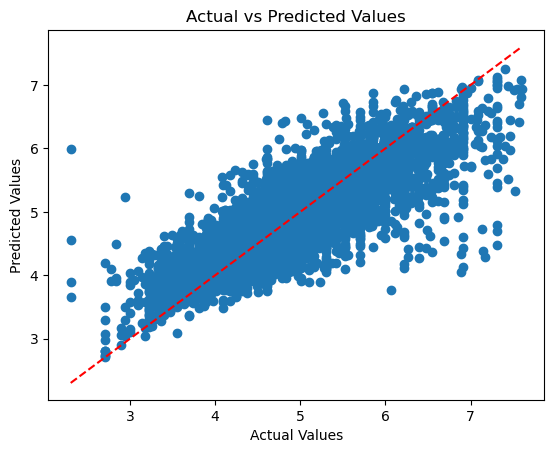

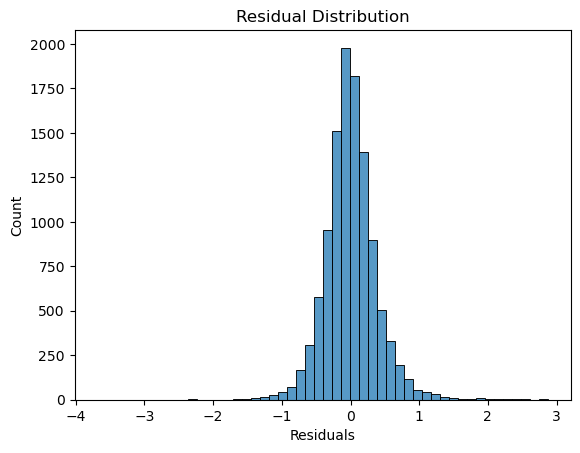

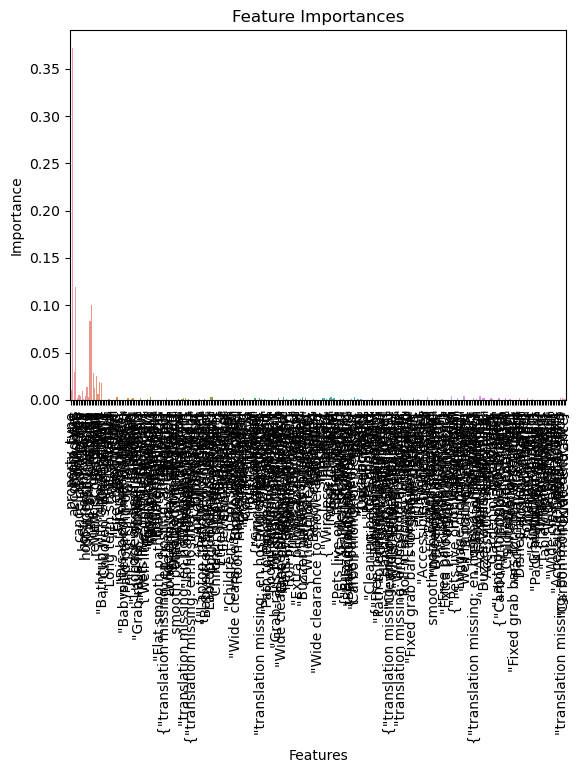

In [26]:
# Visualizations
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

sns.histplot(y_test - y_pred, bins=50)
plt.xlabel('Residuals')
plt.title('Residual Distribution')
plt.show()

sns.barplot(x=X.columns, y=rf_model.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()

print("Top 10 most important features:")
for feature, importance in zip(X.columns, rf_model.feature_importances_):
    print(f"{feature}: {importance:.2f}")


The scatter plot shows:

- Closely packed dots: This indicates that the predicted values are close to the actual values, suggesting that the model is making accurate predictions.
- Red line going through the middle: This indicates that the model is unbiased, meaning it's not systematically overestimating or underestimating the actual values. The red line represents perfect predictions (y=x), and the fact that it goes through the middle of the dots suggests that the model's predictions are centered around the actual values.

The histogram shows:

- Bars rising from below -1 to 0 and then decreasing towards +1: This indicates that the residuals (actual - predicted values) are normally distributed around zero. The histogram's shape suggests that:
    - Most residuals are close to zero, indicating accurate predictions.
    - The residuals are symmetrically distributed around zero, indicating that the model is not biased.

In [23]:

# Feature Importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print("Top 5 most important features:")
print(feature_importances.sort_values(ascending=False).head(5))

Top 5 most important features:
room_type       0.371978
bathrooms       0.118868
longitude       0.100497
latitude        0.083454
accommodates    0.028950
dtype: float64


Feature Importances
The top 5 most important features are:

1. room_type (0.371978): This feature has the highest importance, indicating that the type of room (e.g., private, shared, entire home) has a significant impact on the predicted outcome (likely the price or log price).
2. bathrooms (0.118868): The number of bathrooms is the second most important feature, suggesting that it's a key factor in determining the predicted outcome.
3. longitude (0.100497): The longitude feature is also important, indicating that the location's east-west position has an impact on the predicted outcome.
4. latitude (0.083454): The latitude feature is also significant, suggesting that the location's north-south position affects the predicted outcome.
5. accommodates (0.028950): The number of people the accommodation can accommodate is a less important but still relevant feature.

Insights
These feature importances suggest that:

- Room characteristics (room type, bathrooms, accommodates) are crucial in determining the predicted outcome.
- Location (longitude and latitude) also plays a significant role, likely due to variations in demand, amenities, or other location-specific factors.